# NAME: Dev Agarwal


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.cluster import KMeans
df=pd.read_csv("customerspends.csv")

In [9]:
df.head()

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


# 1. Create a scatter plot to depict the customer spends on apparel and beauty and healthcare products. 

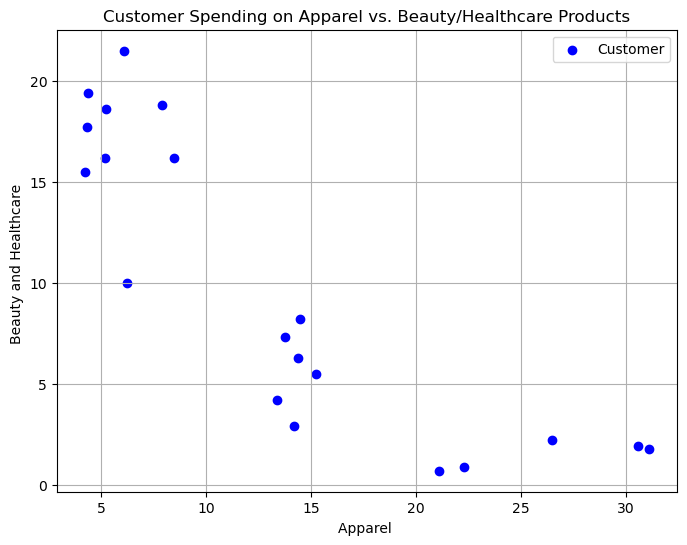

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Apparel'], df['Beauty and Healthcare'], c='b', marker='o', label='Customer')

plt.xlabel('Apparel ')
plt.ylabel('Beauty and Healthcare ')
plt.title('Customer Spending on Apparel vs. Beauty/Healthcare Products')
plt.grid(True)
plt.legend()

plt.show()

# 2. Identify number of clusters existing in the dataset.

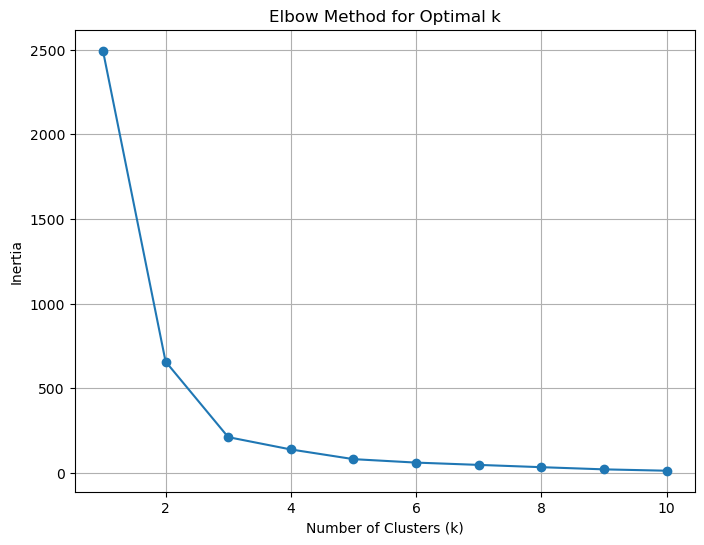

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# 3. Use dendrogram and elbow method to verify if the number of clusters suggested is same as clusters visible in the scatter plot in Question 1.

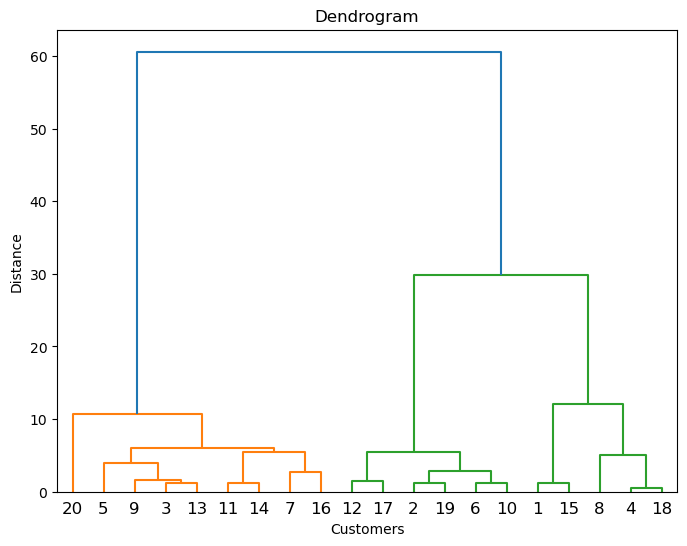

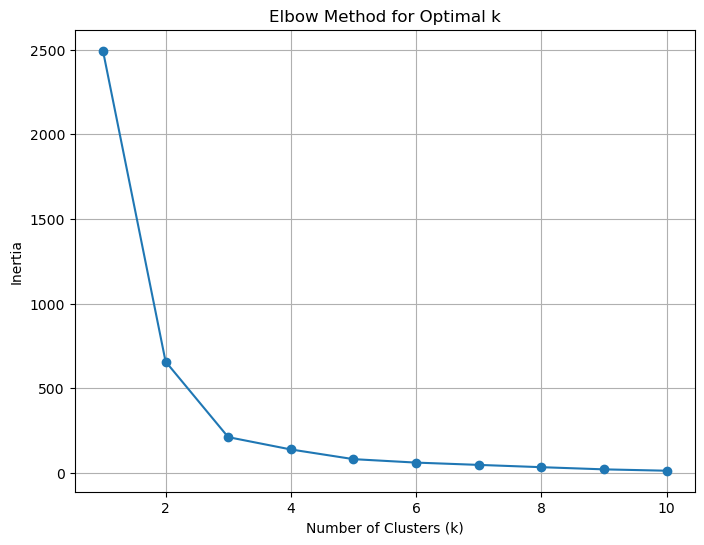

In [17]:
X = df[['Apparel', 'Beauty and Healthcare']]

linkage_matrix = linkage(X, method='ward')

# dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=df['Customer'].tolist())
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


# 4. Create the number of clusters as suggested by the elbow method using K-means algorithm

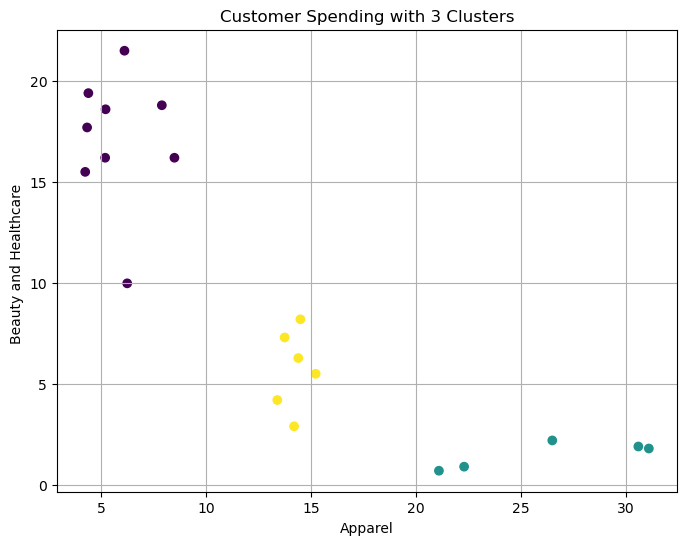

In [5]:
optimal_k = 3 

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['Apparel'], df['Beauty and Healthcare'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Apparel')
plt.ylabel('Beauty and Healthcare ')
plt.title(f'Customer Spending with {optimal_k} Clusters')
plt.grid(True)
plt.show()

# 5. Print the records of customers in each cluster and the cluster center of each cluster separately. Explain the clusters intuitively

In [9]:
for cluster_num in range(optimal_k):
    cluster_records = df[df['Cluster'] == cluster_num]
    cluster_center = kmeans.cluster_centers_[cluster_num]
    print(f"Cluster {cluster_num} - Center: {cluster_center}")
    print(cluster_records)
    print()

Cluster 0 - Center: [ 5.79777778 17.09777778]
    Customer  Apparel  Beauty and Healthcare  Cluster
2          3     5.22                  18.60        0
4          5     6.12                  21.50        0
6          7     8.50                  16.20        0
8          9     4.34                  17.70        0
10        11     5.20                  16.20        0
12        13     4.40                  19.40        0
13        14     4.25                  15.50        0
15        16     7.90                  18.80        0
19        20     6.25                   9.98        0

Cluster 1 - Center: [26.32  1.5 ]
    Customer  Apparel  Beauty and Healthcare  Cluster
0          1     21.1                    0.7        1
3          4     31.1                    1.8        1
7          8     26.5                    2.2        1
14        15     22.3                    0.9        1
17        18     30.6                    1.9        1

Cluster 2 - Center: [14.24666667  5.73      ]
    Cust